In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris # 샘플 데이터 set
from sklearn.linear_model import LinearRegression,Ridge, SGDRegressor # 선형 회귀
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score# 선형 모델(Linear Models)

# SGDRegressor: 학습을 통해
# LinearRegression: 공식
# MLPRegressor: 딥러닝을 통해(학습)

from sklearn.model_selection import train_test_split # 훈련, 테스트 데이터 분할

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# !pip install mglearn

In [12]:
x_data = [1,2,3,4,5,6,7,8,9,10] # 벡터
y_data = [1,2,3,4,5,6,7,8,9,10]

# 1. 공식을 통한 선형회귀
- LinearRegression

In [15]:
model_lr = LinearRegression(    fit_intercept=True, # intercept 구하기
                                normalize=False, # 데이터 정규화
                                copy_X=True, # training 할 때 x 데이터를 복사
                                n_jobs=None # CPU core수
                           )  # LinearRegression 객체 생성

# LinearRegression : **공식**을 이용해서 intercept와 slope를 구하는 방법

In [28]:
# n행 1열 :  행은 데이터의 개수, 열은 특성데이터의 갯수
print( len(x_data) )
# 따라서 x_data를 10행 1열로 줘야함
np.array( x_data ).reshape(-1,1) # 열의 개수를 지정하면 행 값에 -1해도 됨

10


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

## (1) Feature 입력
- x값
    - 반드시 **n행 1열**을 줘야한다
        - 행은 데이터의 개수, 열은 특성데이터의 갯수
    - numpy면 **행렬**
    - pandas면 **dataframe**으로 줘야함

In [29]:
model_lr.fit( np.array( x_data ).reshape(10,1), np.array(y_data) ) 
# 특성데이터는 반드시 **행렬** or **dataframe**으로 줘야함

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model_lr.coef_ # w값 (기울기)

array([1.])

In [33]:
model_lr.intercept_ # b값(y절편)

2.6645352591003757e-15

## [예제-cars.csv]

In [38]:
car_df = pd.read_csv('../data/cars.csv', index_col=0 )
car_df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [40]:
car_df['speed'].head() # Series-1차원-벡터

1    4
2    4
3    7
4    7
5    8
Name: speed, dtype: int64

In [42]:
car_df['dist'].head() # Series-1차원-벡터

1     2
2    10
3     4
4    22
5    16
Name: dist, dtype: int64

In [45]:
car_df[['speed']].head() # DataFrame-2차원-행렬

,speed
1,4
2,4
3,7
4,7
5,8


In [48]:
car_df[['dist']].head()

,dist
1,2
2,10
3,4
4,22
5,16


In [49]:
model_car = LinearRegression()
model_car.fit( car_df[['speed']], car_df[['dist']] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
model_car.coef_ # w값(기울기)

array([[3.93240876]])

In [53]:
model_car.intercept_ # b값( y절편)

array([-17.57909489])

## (2) 예측
- model.predict( [[ ]] )
    - x값을 줄 때에도 **매트릭스**형태로 줘야한다

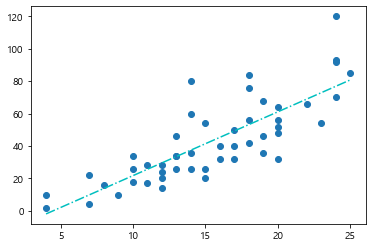

In [102]:
plt.scatter( car_df['speed'], car_df['dist'])

# (1) 수식 직접 입력
# car_lr = model_car.coef_*car_df[['speed']] + model_car.intercept_
# plt.plot(car_df[['speed']], car_lr, 'r--' )

# (2) LinearRegression의 멤버함수인 predict사용
car_lr2 = model_car.predict( car_df[['speed']])
plt.plot(car_df['speed'], car_lr2 , 'c-.' )
plt.show()

In [67]:
model_car.predict( [[15]]) # 예측값을 구할때도 행렬로 줘야함

array([[41.4070365]])

In [69]:
## 자동차 속도가 13, 15인 경우의 제동거리는?

model_car.predict( [[13], [15]] ) # 2행 1열

array([[33.54221898],
       [41.4070365 ]])

In [72]:
x = np.array( [[1,2], [3,4]])
y = np.array( [[3,4], [5,6]])

# predict가 수행하는 방식 - np.matmul

np.matmul( x, y ) # 행렬 곱(matmul)
# 2x2행렬 나옴 
# x, y가 반드시 행렬이어야 함

array([[13, 16],
       [29, 36]])

In [97]:
model_car.predict( car_df[['speed']]) # nx1 feature과 1x1인 w와 곱셈(행렬곱)

array([[-1.84945985],
       [-1.84945985],
       [ 9.94776642],
       [ 9.94776642],
       [13.88017518],
       [17.81258394],
       [21.7449927 ],
       [21.7449927 ],
       [21.7449927 ],
       [25.67740146],
       [25.67740146],
       [29.60981022],
       [29.60981022],
       [29.60981022],
       [29.60981022],
       [33.54221898],
       [33.54221898],
       [33.54221898],
       [33.54221898],
       [37.47462774],
       [37.47462774],
       [37.47462774],
       [37.47462774],
       [41.4070365 ],
       [41.4070365 ],
       [41.4070365 ],
       [45.33944526],
       [45.33944526],
       [49.27185401],
       [49.27185401],
       [49.27185401],
       [53.20426277],
       [53.20426277],
       [53.20426277],
       [53.20426277],
       [57.13667153],
       [57.13667153],
       [57.13667153],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [68.93389781],
       [72.86630657],
       [76

## [연습문제]
- w,b를 구하고 전기 생산량이 3.2인경우와 4.5인경우의 전기 사용량 예측
- 스캐터 차트와 회귀선 그래프를 그리시오

In [108]:
df = pd.read_csv('../data/data4/electric.csv', index_col=0)
df.head()

,전기생산량,전기사용량
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전기생산량   12 non-null     float64
 1   전기사용량   12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [111]:
elec_model = LinearRegression()
elec_model.fit( df[['전기생산량']], df[['전기사용량']] ) # 모델 적용(공식으로 회귀식 도출)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
elec_model.coef_, elec_model.intercept_ # w(기울기),b(절편)

(array([[0.49560324]]), array([0.91958143]))

In [114]:
elec_model.predict( [[3.2],[4.5]])

array([[2.50551178],
       [3.14979599]])

In [117]:
elec_model.predict( df[['전기생산량']] )

array([[2.66410482],
       [2.19823778],
       [2.56002814],
       [2.9366866 ],
       [3.20926838],
       [2.89208231],
       [3.04571931],
       [3.31334506],
       [2.75826943],
       [3.20431235],
       [2.85243405],
       [2.50551178]])

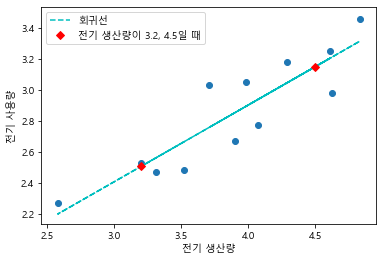

In [140]:
plt.scatter( df[['전기생산량']], df[['전기사용량']]  )
# plt.xlim(0,df['전기생산량'].max() )
# plt.ylim(0,df['전기사용량'].max() )

plt.xlabel('전기 생산량')
plt.ylabel('전기 사용량')

plt.plot( df[['전기생산량']] , elec_model.predict( df[['전기생산량']] )  , 'c--' )

plt.plot( [3.2,4.5], elec_model.predict( [[3.2],[4.5]]), 'rD')
plt.legend(['회귀선', '전기 생산량이 3.2, 4.5일 때'])


plt.show()

## (3) 회귀모델 검증
- 결정계수(Coefficient of Determination, $ R^2 $ )

$ SSR( 예측값 - 평균값 )^2의 합 $

$ ( predictions - dist.mean() )^2 $

$ SST( 실제값 - 평균값 )^2의  합 $


$ SSE( 실제값 - 예측값 )^2의  합 $

$ R^2 = SSR/SST $

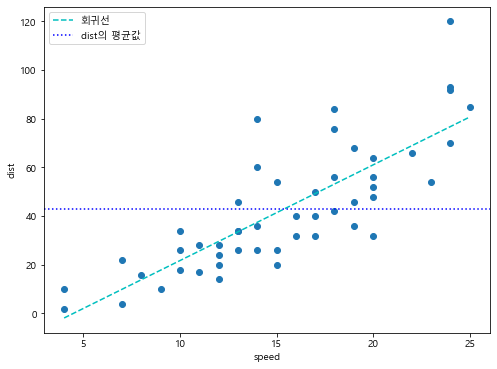

In [149]:
plt.figure( figsize=(8,6))
plt.xlabel('speed')
plt.ylabel('dist')
# 예측값
predictions =model_car.predict(  car_df[['speed']] )
plt.scatter(car_df.speed, car_df.dist)
plt.plot( car_df.speed, predictions, 'c--') 

plt.axhline( car_df.dist.mean(), color='blue', ls=':') # dist의 평균값
plt.legend(['회귀선','dist의 평균값'])
plt.show()


In [154]:
model_car.score(car_df[['speed']] , car_df[['dist']])

0.6510793807582509

In [156]:
from sklearn.metrics import r2_score
y_predict = model_car.predict( car_df[['speed']])
r2_score( car_df.dist, y_predict ) # y_true, y_pred

0.6510793807582509

# 2. 머신러닝-학습을 통한 선형회귀
- x값
    - 반드시 x값을 데이터프레임, 행렬로 주기

In [170]:
modelSGD = SGDRegressor(
                loss='squared_loss',  # mean squared error
                alpha=0.0001,  # learn rate
                max_iter=100, # 학습 횟수
                early_stopping=True,  # cost값에 변화가 없다(학습 충분)면 최저점에 도달했다고 인식
                verbose=1, # 학습횟수와 learn rate등을 출력하는 인자
                    )
# model fit - Expected 2D array => x값은 무조건 행렬, 데이터프레임으로 주기
modelSGD.fit( car_df[['speed']], car_df['dist'] )

-- Epoch 1
Norm: 3.21, NNZs: 1, Bias: 1.394093, T: 45, Avg. loss: 16100.018420
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 1, Bias: 1.022756, T: 90, Avg. loss: 332.036098
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.82, NNZs: 1, Bias: 0.681264, T: 135, Avg. loss: 199.246792
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.24, NNZs: 1, Bias: 0.377368, T: 180, Avg. loss: 255.565045
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.01, NNZs: 1, Bias: 0.011733, T: 225, Avg. loss: 202.673247
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.04, NNZs: 1, Bias: 0.032715, T: 270, Avg. loss: 185.681713
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.53, NNZs: 1, Bias: -0.373986, T: 315, Avg. loss: 252.629231
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.77, NNZs: 1, Bias: -0.495908, T: 360, Avg. loss: 182.064567
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds


SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [174]:
print( '학습을 통한 coef, intercept 값' )
modelSGD.coef_, modelSGD.intercept_

학습을 통한 coef, intercept 값


(array([2.76910512]), array([-0.49590795]))

# 3. 딥러닝-학습을 이용한 선형회귀
- Perceptron
- 딥러닝은 hidden layer가 구성되어 있다

In [211]:
modelNN = MLPRegressor( 
                            hidden_layer_sizes=(100,10), # vector, matrix, 3차원도 올 수 있음. 1개의 히든레이어에 100개로 구성
                            solver='adam', # 향상된 optimizor
                            alpha=0.1, # learn rate
                            max_iter=5000, # 학습 횟수
                            verbose=1, # 값 보이게
#                             early_stopping = True
                        )
# hidden_layer_sizes( 히든레이어 크기, 출력갯수,  히든레이어 갯수)

In [212]:
modelNN.fit( car_df[['speed']], car_df['dist'])

Iteration 1, loss = 1450.43277743
Iteration 2, loss = 1437.10798377
Iteration 3, loss = 1422.52148212
Iteration 4, loss = 1407.65000321
Iteration 5, loss = 1392.51406414
Iteration 6, loss = 1377.29417655
Iteration 7, loss = 1362.06642078
Iteration 8, loss = 1346.85632224
Iteration 9, loss = 1331.66713994
Iteration 10, loss = 1316.51579198
Iteration 11, loss = 1301.38025856
Iteration 12, loss = 1286.23583667
Iteration 13, loss = 1271.12800437
Iteration 14, loss = 1256.09924253
Iteration 15, loss = 1241.15312007
Iteration 16, loss = 1226.29233217
Iteration 17, loss = 1211.51671014
Iteration 18, loss = 1196.88427573
Iteration 19, loss = 1183.30579133
Iteration 20, loss = 1170.85681968
Iteration 21, loss = 1158.45274631
Iteration 22, loss = 1147.72485431
Iteration 23, loss = 1139.69143114
Iteration 24, loss = 1132.43774608
Iteration 25, loss = 1125.62723500
Iteration 26, loss = 1118.72391953
Iteration 27, loss = 1111.72183725
Iteration 28, loss = 1104.62596784
Iteration 29, loss = 1097.434

Iteration 324, loss = 128.03619472
Iteration 325, loss = 127.99581248
Iteration 326, loss = 127.94201951
Iteration 327, loss = 127.89762810
Iteration 328, loss = 127.85268731
Iteration 329, loss = 127.80767652
Iteration 330, loss = 127.76128664
Iteration 331, loss = 127.71581699
Iteration 332, loss = 127.67626438
Iteration 333, loss = 127.62458807
Iteration 334, loss = 127.57936298
Iteration 335, loss = 127.53260748
Iteration 336, loss = 127.48593164
Iteration 337, loss = 127.44065718
Iteration 338, loss = 127.39610910
Iteration 339, loss = 127.34773217
Iteration 340, loss = 127.30202544
Iteration 341, loss = 127.25572654
Iteration 342, loss = 127.20884750
Iteration 343, loss = 127.16149803
Iteration 344, loss = 127.11422538
Iteration 345, loss = 127.07230924
Iteration 346, loss = 127.01961159
Iteration 347, loss = 126.97389345
Iteration 348, loss = 126.92787066
Iteration 349, loss = 126.88183487
Iteration 350, loss = 126.83342968
Iteration 351, loss = 126.78743446
Iteration 352, loss 

Iteration 626, loss = 115.57675081
Iteration 627, loss = 115.55152197
Iteration 628, loss = 115.52697915
Iteration 629, loss = 115.50474545
Iteration 630, loss = 115.48110268
Iteration 631, loss = 115.45678477
Iteration 632, loss = 115.43304382
Iteration 633, loss = 115.41144420
Iteration 634, loss = 115.38850119
Iteration 635, loss = 115.36544979
Iteration 636, loss = 115.34153224
Iteration 637, loss = 115.31947696
Iteration 638, loss = 115.29673229
Iteration 639, loss = 115.27352461
Iteration 640, loss = 115.25016984
Iteration 641, loss = 115.22732819
Iteration 642, loss = 115.20593986
Iteration 643, loss = 115.18363339
Iteration 644, loss = 115.16222282
Iteration 645, loss = 115.14124106
Iteration 646, loss = 115.11845450
Iteration 647, loss = 115.09753570
Iteration 648, loss = 115.07633171
Iteration 649, loss = 115.05466865
Iteration 650, loss = 115.03457570
Iteration 651, loss = 115.01265275
Iteration 652, loss = 114.99267767
Iteration 653, loss = 114.97308232
Iteration 654, loss 

Iteration 945, loss = 112.23866014
Iteration 946, loss = 112.23451753
Iteration 947, loss = 112.23032619
Iteration 948, loss = 112.22642099
Iteration 949, loss = 112.22204153
Iteration 950, loss = 112.21795779
Iteration 951, loss = 112.21352439
Iteration 952, loss = 112.20930451
Iteration 953, loss = 112.20551297
Iteration 954, loss = 112.20122499
Iteration 955, loss = 112.19715099
Iteration 956, loss = 112.19291316
Iteration 957, loss = 112.18892672
Iteration 958, loss = 112.18482186
Iteration 959, loss = 112.18098832
Iteration 960, loss = 112.17669657
Iteration 961, loss = 112.17291723
Iteration 962, loss = 112.16865144
Iteration 963, loss = 112.16463015
Iteration 964, loss = 112.16068293
Iteration 965, loss = 112.15665764
Iteration 966, loss = 112.15265505
Iteration 967, loss = 112.14871987
Iteration 968, loss = 112.14479651
Iteration 969, loss = 112.14088740
Iteration 970, loss = 112.13703152
Iteration 971, loss = 112.13328358
Iteration 972, loss = 112.12940135
Iteration 973, loss 

Iteration 1251, loss = 111.43592109
Iteration 1252, loss = 111.43652302
Iteration 1253, loss = 111.43261175
Iteration 1254, loss = 111.43111457
Iteration 1255, loss = 111.43330507
Iteration 1256, loss = 111.43482490
Iteration 1257, loss = 111.43012069
Iteration 1258, loss = 111.42525094
Iteration 1259, loss = 111.42257923
Iteration 1260, loss = 111.42414614
Iteration 1261, loss = 111.42309543
Iteration 1262, loss = 111.42066675
Iteration 1263, loss = 111.41717026
Iteration 1264, loss = 111.41552877
Iteration 1265, loss = 111.41538635
Iteration 1266, loss = 111.41413266
Iteration 1267, loss = 111.41090494
Iteration 1268, loss = 111.40873117
Iteration 1269, loss = 111.40893374
Iteration 1270, loss = 111.40749878
Iteration 1271, loss = 111.40579127
Iteration 1272, loss = 111.40235759
Iteration 1273, loss = 111.40185168
Iteration 1274, loss = 111.40176311
Iteration 1275, loss = 111.40077764
Iteration 1276, loss = 111.39788515
Iteration 1277, loss = 111.39552753
Iteration 1278, loss = 111.3

Iteration 1568, loss = 111.08806232
Iteration 1569, loss = 111.08952161
Iteration 1570, loss = 111.08826243
Iteration 1571, loss = 111.08764914
Iteration 1572, loss = 111.08799937
Iteration 1573, loss = 111.08714209
Iteration 1574, loss = 111.08461958
Iteration 1575, loss = 111.08649348
Iteration 1576, loss = 111.08589940
Iteration 1577, loss = 111.08321709
Iteration 1578, loss = 111.08183495
Iteration 1579, loss = 111.08216839
Iteration 1580, loss = 111.08171963
Iteration 1581, loss = 111.07921071
Iteration 1582, loss = 111.07663457
Iteration 1583, loss = 111.07589578
Iteration 1584, loss = 111.07597693
Iteration 1585, loss = 111.07575651
Iteration 1586, loss = 111.07344923
Iteration 1587, loss = 111.07522112
Iteration 1588, loss = 111.07446135
Iteration 1589, loss = 111.07145104
Iteration 1590, loss = 111.07105996
Iteration 1591, loss = 111.07030491
Iteration 1592, loss = 111.06854068
Iteration 1593, loss = 111.06779939
Iteration 1594, loss = 111.06883490
Iteration 1595, loss = 111.0

Iteration 1870, loss = 110.84525051
Iteration 1871, loss = 110.84120440
Iteration 1872, loss = 110.84347810
Iteration 1873, loss = 110.84441557
Iteration 1874, loss = 110.84352291
Iteration 1875, loss = 110.84048673
Iteration 1876, loss = 110.83570699
Iteration 1877, loss = 110.83680140
Iteration 1878, loss = 110.83451553
Iteration 1879, loss = 110.83682065
Iteration 1880, loss = 110.83743811
Iteration 1881, loss = 110.83538660
Iteration 1882, loss = 110.83064242
Iteration 1883, loss = 110.83415642
Iteration 1884, loss = 110.83608053
Iteration 1885, loss = 110.83362827
Iteration 1886, loss = 110.82804127
Iteration 1887, loss = 110.83109995
Iteration 1888, loss = 110.83206239
Iteration 1889, loss = 110.83275715
Iteration 1890, loss = 110.83092441
Iteration 1891, loss = 110.82630399
Iteration 1892, loss = 110.82496936
Iteration 1893, loss = 110.82698540
Iteration 1894, loss = 110.82474276
Iteration 1895, loss = 110.81936728
Iteration 1896, loss = 110.82320090
Iteration 1897, loss = 110.8

Iteration 2175, loss = 110.56155117
Iteration 2176, loss = 110.56125670
Iteration 2177, loss = 110.55843646
Iteration 2178, loss = 110.56047025
Iteration 2179, loss = 110.56169730
Iteration 2180, loss = 110.55961576
Iteration 2181, loss = 110.55578089
Iteration 2182, loss = 110.55619214
Iteration 2183, loss = 110.55738192
Iteration 2184, loss = 110.55523743
Iteration 2185, loss = 110.55088923
Iteration 2186, loss = 110.55112096
Iteration 2187, loss = 110.54908970
Iteration 2188, loss = 110.54987177
Iteration 2189, loss = 110.54953618
Iteration 2190, loss = 110.54579393
Iteration 2191, loss = 110.54939457
Iteration 2192, loss = 110.55044741
Iteration 2193, loss = 110.54868951
Iteration 2194, loss = 110.54538166
Iteration 2195, loss = 110.54105286
Iteration 2196, loss = 110.54182345
Iteration 2197, loss = 110.53894612
Iteration 2198, loss = 110.54092340
Iteration 2199, loss = 110.54120723
Iteration 2200, loss = 110.53871778
Iteration 2201, loss = 110.53488680
Iteration 2202, loss = 110.5

Iteration 2478, loss = 110.29340318
Iteration 2479, loss = 110.29476902
Iteration 2480, loss = 110.29307037
Iteration 2481, loss = 110.28971614
Iteration 2482, loss = 110.29160938
Iteration 2483, loss = 110.29243194
Iteration 2484, loss = 110.29064649
Iteration 2485, loss = 110.28611375
Iteration 2486, loss = 110.28819842
Iteration 2487, loss = 110.29001116
Iteration 2488, loss = 110.28887904
Iteration 2489, loss = 110.28510576
Iteration 2490, loss = 110.28211464
Iteration 2491, loss = 110.28302066
Iteration 2492, loss = 110.28136690
Iteration 2493, loss = 110.27916970
Iteration 2494, loss = 110.27908756
Iteration 2495, loss = 110.27749102
Iteration 2496, loss = 110.27556176
Iteration 2497, loss = 110.27794196
Iteration 2498, loss = 110.27767102
Iteration 2499, loss = 110.27433984
Iteration 2500, loss = 110.27558323
Iteration 2501, loss = 110.27608864
Iteration 2502, loss = 110.27378052
Iteration 2503, loss = 110.26963901
Iteration 2504, loss = 110.26911150
Iteration 2505, loss = 110.2

Iteration 2789, loss = 110.03117675
Iteration 2790, loss = 110.02995232
Iteration 2791, loss = 110.02607536
Iteration 2792, loss = 110.02283891
Iteration 2793, loss = 110.02431943
Iteration 2794, loss = 110.02254631
Iteration 2795, loss = 110.01964494
Iteration 2796, loss = 110.01991310
Iteration 2797, loss = 110.01704855
Iteration 2798, loss = 110.01708461
Iteration 2799, loss = 110.01654990
Iteration 2800, loss = 110.01507643
Iteration 2801, loss = 110.01475770
Iteration 2802, loss = 110.01314686
Iteration 2803, loss = 110.01307460
Iteration 2804, loss = 110.01188624
Iteration 2805, loss = 110.01041869
Iteration 2806, loss = 110.01071792
Iteration 2807, loss = 110.00876198
Iteration 2808, loss = 110.01145147
Iteration 2809, loss = 110.01088238
Iteration 2810, loss = 110.00692435
Iteration 2811, loss = 110.00952571
Iteration 2812, loss = 110.01085486
Iteration 2813, loss = 110.00853008
Iteration 2814, loss = 110.00457597
Iteration 2815, loss = 110.00777416
Iteration 2816, loss = 110.0

Iteration 3083, loss = 109.77863214
Iteration 3084, loss = 109.77866660
Iteration 3085, loss = 109.77626488
Iteration 3086, loss = 109.77728390
Iteration 3087, loss = 109.77555256
Iteration 3088, loss = 109.77715717
Iteration 3089, loss = 109.77614511
Iteration 3090, loss = 109.77260473
Iteration 3091, loss = 109.77178809
Iteration 3092, loss = 109.77325362
Iteration 3093, loss = 109.77166207
Iteration 3094, loss = 109.77113156
Iteration 3095, loss = 109.77081046
Iteration 3096, loss = 109.76773997
Iteration 3097, loss = 109.77053282
Iteration 3098, loss = 109.77168560
Iteration 3099, loss = 109.76795278
Iteration 3100, loss = 109.76668203
Iteration 3101, loss = 109.76785915
Iteration 3102, loss = 109.76629383
Iteration 3103, loss = 109.76166260
Iteration 3104, loss = 109.76757481
Iteration 3105, loss = 109.76930789
Iteration 3106, loss = 109.76702283
Iteration 3107, loss = 109.76113403
Iteration 3108, loss = 109.76206223
Iteration 3109, loss = 109.76484164
Iteration 3110, loss = 109.7

Iteration 3386, loss = 109.54026372
Iteration 3387, loss = 109.53964917
Iteration 3388, loss = 109.54248510
Iteration 3389, loss = 109.53984829
Iteration 3390, loss = 109.53432683
Iteration 3391, loss = 109.53976528
Iteration 3392, loss = 109.54211872
Iteration 3393, loss = 109.54260233
Iteration 3394, loss = 109.53959225
Iteration 3395, loss = 109.53432000
Iteration 3396, loss = 109.53156426
Iteration 3397, loss = 109.53419934
Iteration 3398, loss = 109.53190866
Iteration 3399, loss = 109.52732832
Iteration 3400, loss = 109.52797533
Iteration 3401, loss = 109.52561703
Iteration 3402, loss = 109.52838016
Iteration 3403, loss = 109.52753793
Iteration 3404, loss = 109.52285868
Iteration 3405, loss = 109.52298151
Iteration 3406, loss = 109.52320770
Iteration 3407, loss = 109.52096859
Iteration 3408, loss = 109.52421900
Iteration 3409, loss = 109.52506740
Iteration 3410, loss = 109.52315606
Iteration 3411, loss = 109.51865462
Iteration 3412, loss = 109.52282309
Iteration 3413, loss = 109.5

Iteration 3685, loss = 109.31762119
Iteration 3686, loss = 109.31900483
Iteration 3687, loss = 109.31660027
Iteration 3688, loss = 109.31529110
Iteration 3689, loss = 109.31827734
Iteration 3690, loss = 109.31629222
Iteration 3691, loss = 109.31519255
Iteration 3692, loss = 109.31618055
Iteration 3693, loss = 109.31463095
Iteration 3694, loss = 109.31190407
Iteration 3695, loss = 109.31086894
Iteration 3696, loss = 109.31258857
Iteration 3697, loss = 109.31259604
Iteration 3698, loss = 109.31008800
Iteration 3699, loss = 109.30953145
Iteration 3700, loss = 109.30884324
Iteration 3701, loss = 109.30781054
Iteration 3702, loss = 109.30765792
Iteration 3703, loss = 109.30543982
Iteration 3704, loss = 109.30791408
Iteration 3705, loss = 109.30720700
Iteration 3706, loss = 109.30300319
Iteration 3707, loss = 109.30315096
Iteration 3708, loss = 109.30147376
Iteration 3709, loss = 109.30200377
Iteration 3710, loss = 109.30110493
Iteration 3711, loss = 109.30150780
Iteration 3712, loss = 109.2

Iteration 3999, loss = 109.11167172
Iteration 4000, loss = 109.11568592
Iteration 4001, loss = 109.11744427
Iteration 4002, loss = 109.11357086
Iteration 4003, loss = 109.10992781
Iteration 4004, loss = 109.11176570
Iteration 4005, loss = 109.11143247
Iteration 4006, loss = 109.10904686
Iteration 4007, loss = 109.10655449
Iteration 4008, loss = 109.10605212
Iteration 4009, loss = 109.10634593
Iteration 4010, loss = 109.10671179
Iteration 4011, loss = 109.10487469
Iteration 4012, loss = 109.10454444
Iteration 4013, loss = 109.10320523
Iteration 4014, loss = 109.10362200
Iteration 4015, loss = 109.10442411
Iteration 4016, loss = 109.10276823
Iteration 4017, loss = 109.09929011
Iteration 4018, loss = 109.09911925
Iteration 4019, loss = 109.09927120
Iteration 4020, loss = 109.09847061
Iteration 4021, loss = 109.09771456
Iteration 4022, loss = 109.09804996
Iteration 4023, loss = 109.09567382
Iteration 4024, loss = 109.09623173
Iteration 4025, loss = 109.09664497
Iteration 4026, loss = 109.0

Iteration 4316, loss = 108.94042378
Iteration 4317, loss = 108.93900273
Iteration 4318, loss = 108.93562869
Iteration 4319, loss = 108.93066755
Iteration 4320, loss = 108.93381152
Iteration 4321, loss = 108.93661243
Iteration 4322, loss = 108.93310671
Iteration 4323, loss = 108.92735230
Iteration 4324, loss = 108.92934010
Iteration 4325, loss = 108.92925706
Iteration 4326, loss = 108.92728099
Iteration 4327, loss = 108.92482404
Iteration 4328, loss = 108.92380066
Iteration 4329, loss = 108.92568600
Iteration 4330, loss = 108.92395346
Iteration 4331, loss = 108.92343774
Iteration 4332, loss = 108.92292465
Iteration 4333, loss = 108.92221060
Iteration 4334, loss = 108.92219303
Iteration 4335, loss = 108.92263649
Iteration 4336, loss = 108.92016349
Iteration 4337, loss = 108.91932260
Iteration 4338, loss = 108.92242468
Iteration 4339, loss = 108.91934180
Iteration 4340, loss = 108.92162228
Iteration 4341, loss = 108.92312807
Iteration 4342, loss = 108.92279269
Iteration 4343, loss = 108.9

Iteration 4614, loss = 108.77301005
Iteration 4615, loss = 108.77084659
Iteration 4616, loss = 108.77094053
Iteration 4617, loss = 108.77251894
Iteration 4618, loss = 108.76882287
Iteration 4619, loss = 108.76811029
Iteration 4620, loss = 108.76973450
Iteration 4621, loss = 108.76724126
Iteration 4622, loss = 108.76749186
Iteration 4623, loss = 108.76893618
Iteration 4624, loss = 108.76594772
Iteration 4625, loss = 108.76633294
Iteration 4626, loss = 108.76874201
Iteration 4627, loss = 108.76423827
Iteration 4628, loss = 108.76401156
Iteration 4629, loss = 108.76700586
Iteration 4630, loss = 108.76411865
Iteration 4631, loss = 108.76247649
Iteration 4632, loss = 108.76418366
Iteration 4633, loss = 108.76187763
Iteration 4634, loss = 108.76129835
Iteration 4635, loss = 108.76249103
Iteration 4636, loss = 108.76005747
Iteration 4637, loss = 108.75995163
Iteration 4638, loss = 108.76180793
Iteration 4639, loss = 108.75825434
Iteration 4640, loss = 108.75734196
Iteration 4641, loss = 108.7

Iteration 4924, loss = 108.63944601
Iteration 4925, loss = 108.63646192
Iteration 4926, loss = 108.64284305
Iteration 4927, loss = 108.64366242
Iteration 4928, loss = 108.63620842
Iteration 4929, loss = 108.63882006
Iteration 4930, loss = 108.64274345
Iteration 4931, loss = 108.64327408
Iteration 4932, loss = 108.64410216
Iteration 4933, loss = 108.64237043
Iteration 4934, loss = 108.63755388
Iteration 4935, loss = 108.63325101
Iteration 4936, loss = 108.64427787
Iteration 4937, loss = 108.64758794
Iteration 4938, loss = 108.64153553
Iteration 4939, loss = 108.63234572
Iteration 4940, loss = 108.63593641
Iteration 4941, loss = 108.63724800
Iteration 4942, loss = 108.63752600
Iteration 4943, loss = 108.63549263
Iteration 4944, loss = 108.63114343
Iteration 4945, loss = 108.63518000
Iteration 4946, loss = 108.63729170
Iteration 4947, loss = 108.63093805
Iteration 4948, loss = 108.63280201
Iteration 4949, loss = 108.63537972
Iteration 4950, loss = 108.63685970
Iteration 4951, loss = 108.6

C:\Users\master4\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [213]:
modelNN.coefs_ # 100개씩 10개가 나옴

[array([[-1.48824984e-095, -3.98061124e-002, -4.36043589e-002,
         -4.31388607e-002,  1.94100825e-001,  2.43646363e-001,
          2.95218158e-001,  2.80656453e-001,  3.28137825e-001,
          2.25644363e-001,  1.87812213e-001,  2.15932224e-001,
          3.12937790e-001,  2.43148816e-001,  4.12145580e-001,
          1.50645304e-110, -4.38676163e-002,  1.71205397e-002,
         -2.06161296e-001,  1.85923540e-001,  1.36294534e-096,
         -9.42806080e-117,  1.82827523e-001, -5.26070533e-117,
          1.01162334e-001,  2.17132427e-001, -1.94016272e-001,
          3.53396580e-001,  2.87789621e-001, -3.86381498e-002,
          2.84242911e-001, -4.05835838e-002, -2.10344433e-096,
         -8.14356915e-003, -4.26938695e-002,  5.30803736e-100,
         -9.93346421e-093,  1.23415721e-109,  1.58410956e-112,
          2.11873930e-001, -6.67656443e-002,  2.10394890e-001,
         -2.75856532e-003,  1.85974858e-001,  1.60244593e-001,
         -1.10012583e-115, -7.12251569e-095,  1.5420737

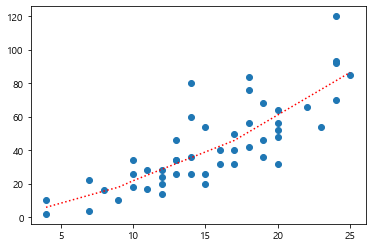

In [214]:
plt.scatter( car_df['speed'], car_df['dist'])
plt.plot(car_df['speed'],  modelNN.predict( car_df[['speed']] ) , 'r:')
